## Warmup

I have a response schedule

$$y(x) = \alpha + \beta x + \gamma x^2$$

and data $(y_i,x_i)$.

I want to estimate $\arg \min y(x)$ (assume $y$ is convex) and get a confidence interval?

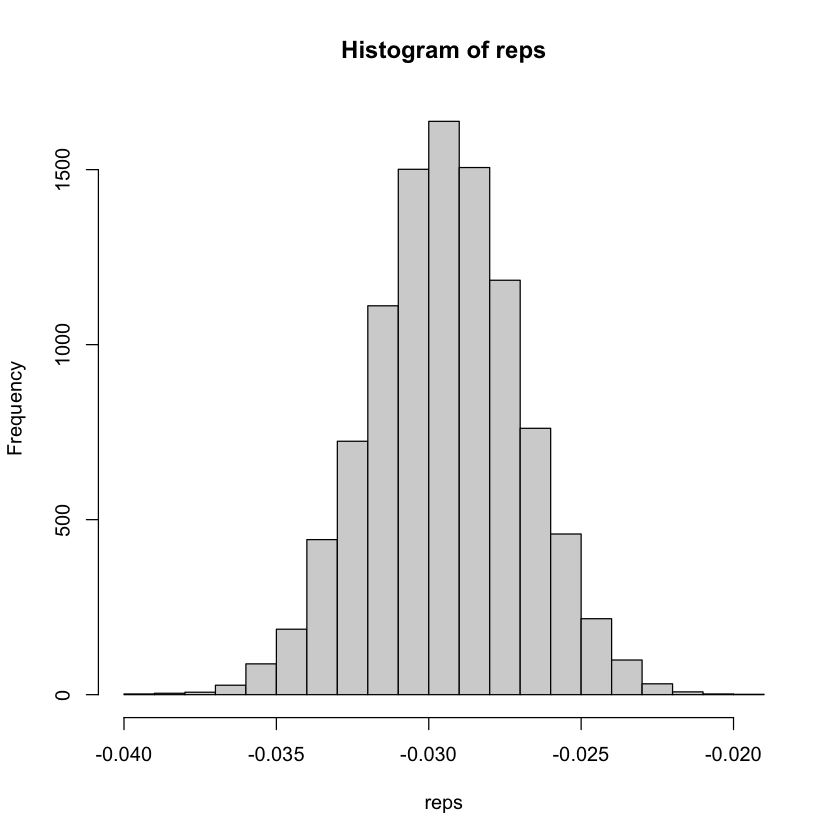

In [65]:
# simulate the model

set.seed(1)

n <- 20
alpha <- .05
beta <- exp(1)
gamma <- 42

x <- rnorm(n = n)
eps <- rnorm(n = n)
y <- alpha + beta * x + gamma * x^2 + eps

mdl <- lm(y ~ x + I(x^2))
alpha_hat <- coef(mdl)[1]
beta_hat <- coef(mdl)[2]
gamma_hat <- coef(mdl)[3]

bs <- function() {
    eps1 <- resid(mdl) %>% sample(replace=T)
    y_bs <- alpha_hat + beta_hat * x + gamma_hat * x^2 + eps1
    b_bs <- lm(y_bs ~ x + I(x^2)) %>% coef
    -.5 * b_bs[2] / b_bs[3]
}

# reps <- replicate(10000, bs())

hist(reps)

In [68]:
quantile(reps, c(0.025, 0.975))

-.5 * beta / gamma

2.5%       97.5% 
-0.03428023 -0.02458755

[1] -0.0323605

In [ ]:
# bootstrap ci

## Example from book

$$y_t = \alpha + \beta y_{t-1} + \epsilon_t$$

- Bias in $\hat{\beta}$?
- Confidence interval for $\hat{\beta}$?

In [124]:
# simulate the model

alpha <- 6.02
beta <- .9

eps = rnorm(n = 20)
y0 = 1.

gen_y <- function(eps, y0, alpha_hat, beta_hat) {
    y <- c()
    for (i in 1:20)  {
        y0 <- alpha_hat + beta_hat * y0 + eps[i]
        y <- c(y, y0)
    }
    y
}

y <- gen_y(rnorm(20), 1., alpha, beta)
mdl <- lm(y ~ lag(y))
alpha_hat <- coef(mdl)[1]
beta_hat <- coef(mdl)[2]
r <- resid(mdl)

betas <- c()

for (i in 1:10000) {
    resid_i <- sample(r, replace=T)
    y_i <- gen_y(resid_i, 1., alpha_hat, beta_hat)
    mdl1 <- lm(y_i ~ lag(y_i))
    betas <- c(betas, coef(mdl1)[2])
}

In [128]:
mean(betas)

[1] 0.8768815

In [134]:
install.packages("alr4")
# library(alr4)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘effects’


Warning message in install.packages("alr4"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("alr4"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("alr4"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("alr4"):
“installation of package ‘effects’ had non-zero exit status”
Warning message in install.packages("alr4"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("alr4"):
“installation of package ‘alr4’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [131]:
alr4::Challeng %>% as_tibble

ERROR: Error in loadNamespace(x): there is no package called ‘alr4’


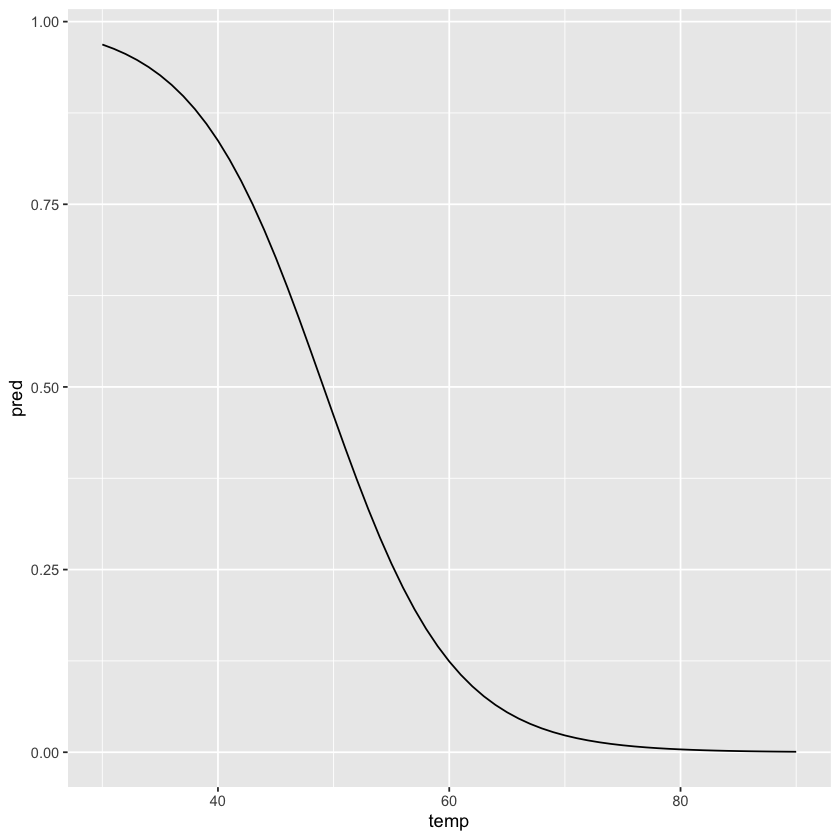

In [171]:
# regression of fail on predictors

# df <- read_table("o-ring-erosion-only.data", col_names = c("n", "fail", "temp", "pres", "i"))
mdl <- glm(fail / 6 ~ temp, data = df, family = "binomial", weights = rep(6, nrow(df)))

library(modelr)
tibble(temp=30:90) %>% add_predictions(mdl, type="response") %>% 
    ggplot + geom_line(aes(x = temp, y=pred))

# df %>% add_predictions(mdl, type="response")

In [99]:
# regression of I(fail > 0) on predictors

### Bootstrapping confidence intervals

- How to bootstrap a GLM?

## Example

$$y_i = \alpha + \beta y_{i-1} + \epsilon_i$$

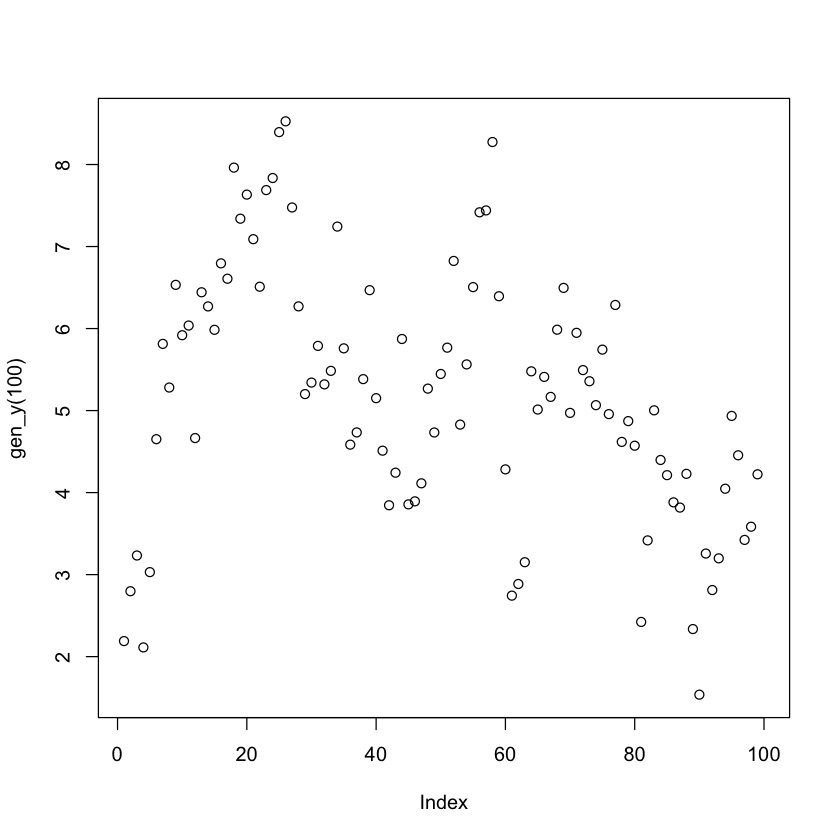

In [50]:
gen_y <- function(n, alpha=NA, beta=NA, eps=NULL) {
    y_i = 0.
    y <- c()
    if (is.na(alpha)) {
        alpha <- 1.
        beta <- .8
    }
    if (is.null(eps)) {
        eps <- rnorm(n=n - 1)
    }
    for (i in 1:n) {
        y_i <- alpha + beta * y_i + eps[i]
        y <- c(y, y_i)
    }
    y
}

plot(gen_y(100))

[1] 0.769566

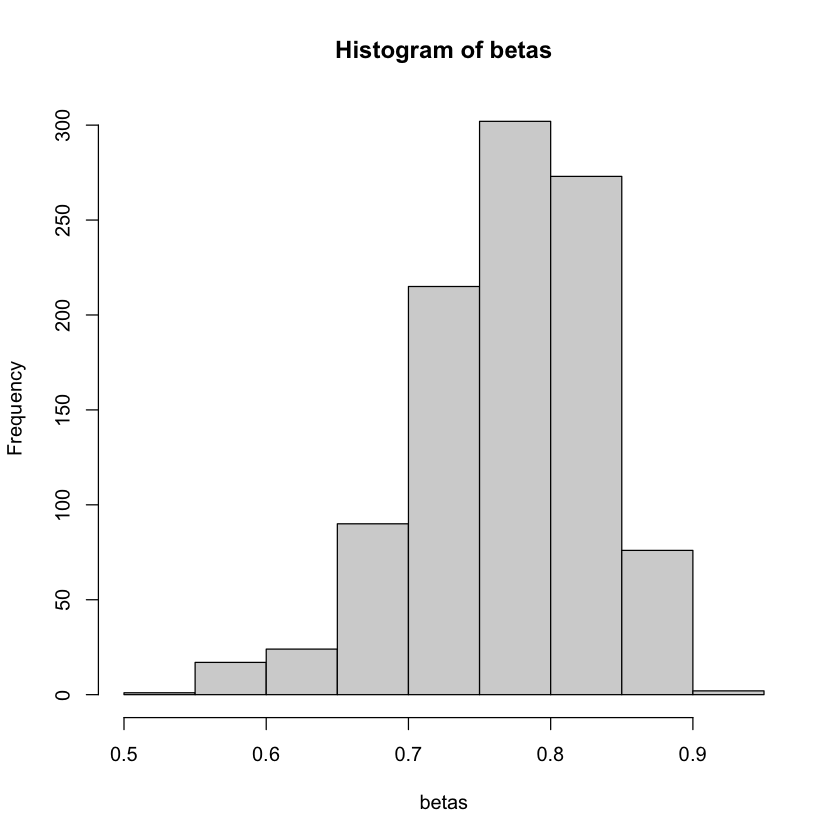

In [43]:
betas <- c()
for (i in 1:1000) {
    y <- gen_y(100)
    betas <- c(betas, coef(lm(y ~ lag(y)))[2])
}
hist(betas)
mean(betas)

In [75]:
bs <- function(y) {
    mdl <- lm(y ~ lag(y))
    alpha_hat = coef(mdl)[1]
    beta_hat = coef(mdl)[2]
    r <- residuals(mdl)
    b <- c()
    for (i in 1:1000) {
        yi <- gen_y(100, alpha=alpha_hat, beta=beta_hat, eps=sample(r, replace=T))
        mdl <- lm(yi ~ lag(yi))
        b <- c(b, coef(mdl)[2])
    }
    b - beta_hat
}

y <- gen_y(100)
sd(bs(y))


[1] 0.0563835